In [ ]:
# Import Basic Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier



In [ ]:
data = pd.read_csv('winequality-red.csv')

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Also there is no column with null values

**Data Description**

Fixed Acidity : are non-volatile acids that do not evaporate readily

Volatile Acidity: are high acetic acid in wine which leads to an unpleasant vinegar taste

Citric Acid: acts as a preservative to increase acidity. When in small quantities, adds freshness and flavor to wines

Residual Sugar: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between sweetness and sourness. It is important to note that wines > 45g/ltrs are sweet

Chlorides: the amount of salt in the wine

Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine

Total Sulfur Dioxide: is the amount of free + bound forms of SO2

Density: sweeter wines have a higher density

pH: describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale

Alcohol: available in small quantities in wines makes the drinkers sociable

Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant

Quality: which is the output variable/predictor


EDA

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Univariate Analysis**

In [ ]:
# Start with plotting Histogram

cols_name = list(data.columns)
cols_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

<ipython-input-14-6253eef8ff38>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols_name[i-1]])
<ipython-input-14-6253eef8ff38>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols_name[i-1]])
<ipython-input-14-6253eef8ff38>:4: UserWarning: 

`distplot` is a deprecated function and 

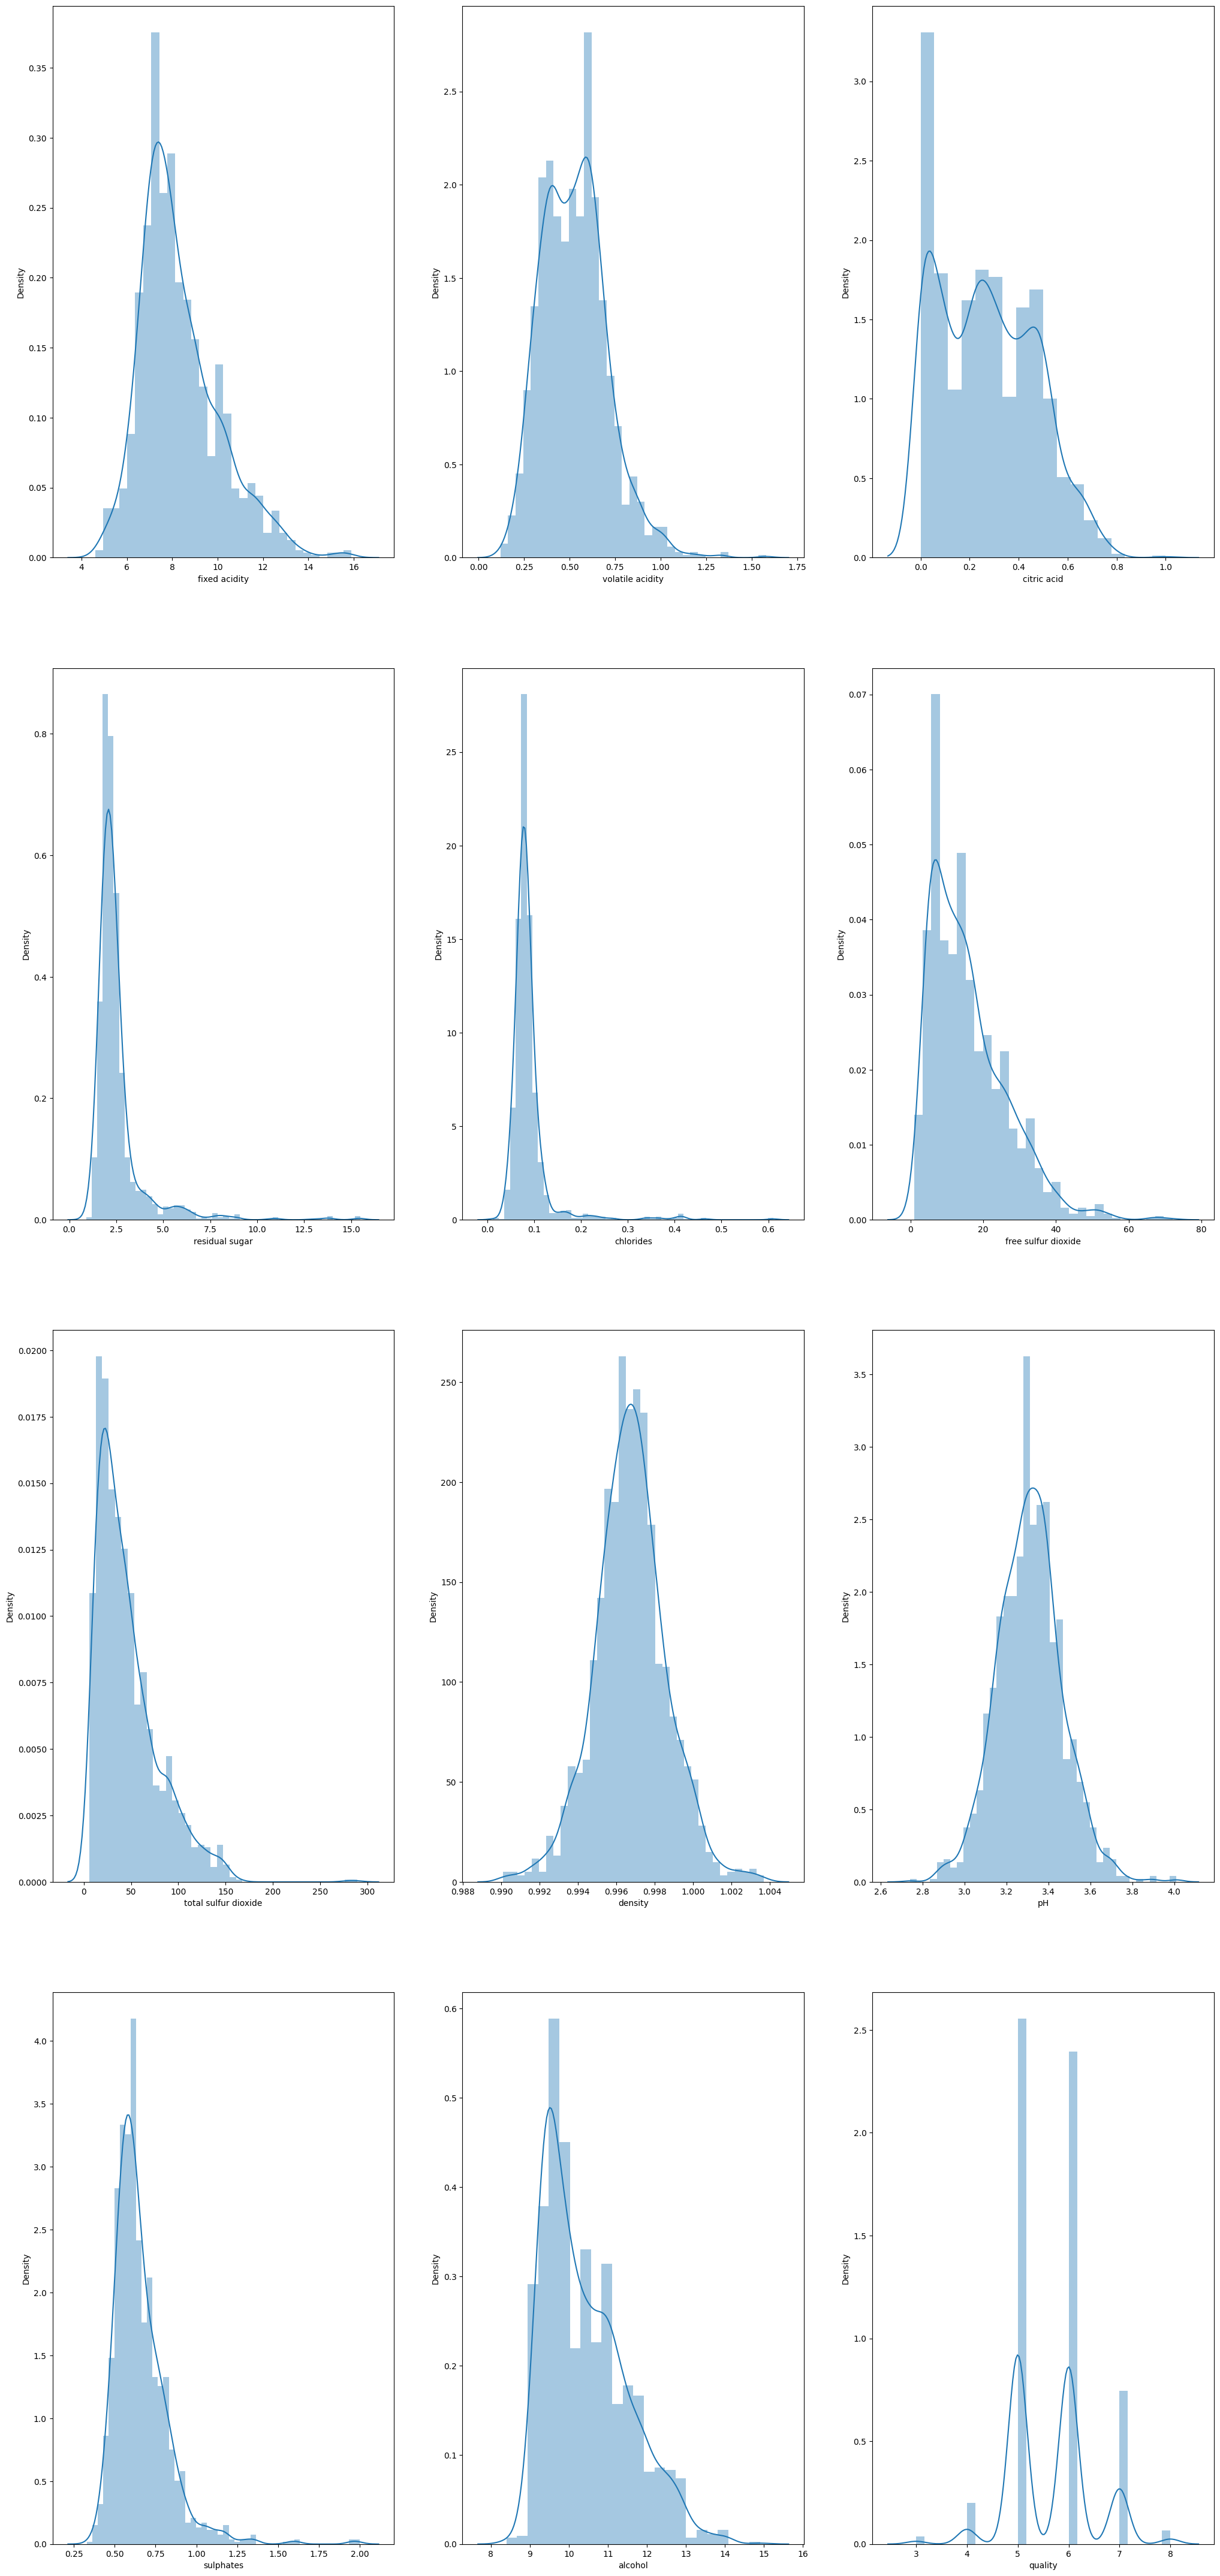

In [ ]:
plt.figure(figsize = (25,55))
for i in range(1, len(cols_name)+1):
    plt.subplot(4, 3, i)
    sns.distplot(data[cols_name[i-1]])
plt.show()

<ipython-input-15-bba12be68620>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols_name[i-1]])
<ipython-input-15-bba12be68620>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols_name[i-1]])
<ipython-input-15-bba12be68620>:9: UserWarning: 

`distplot` is a deprecated function and 

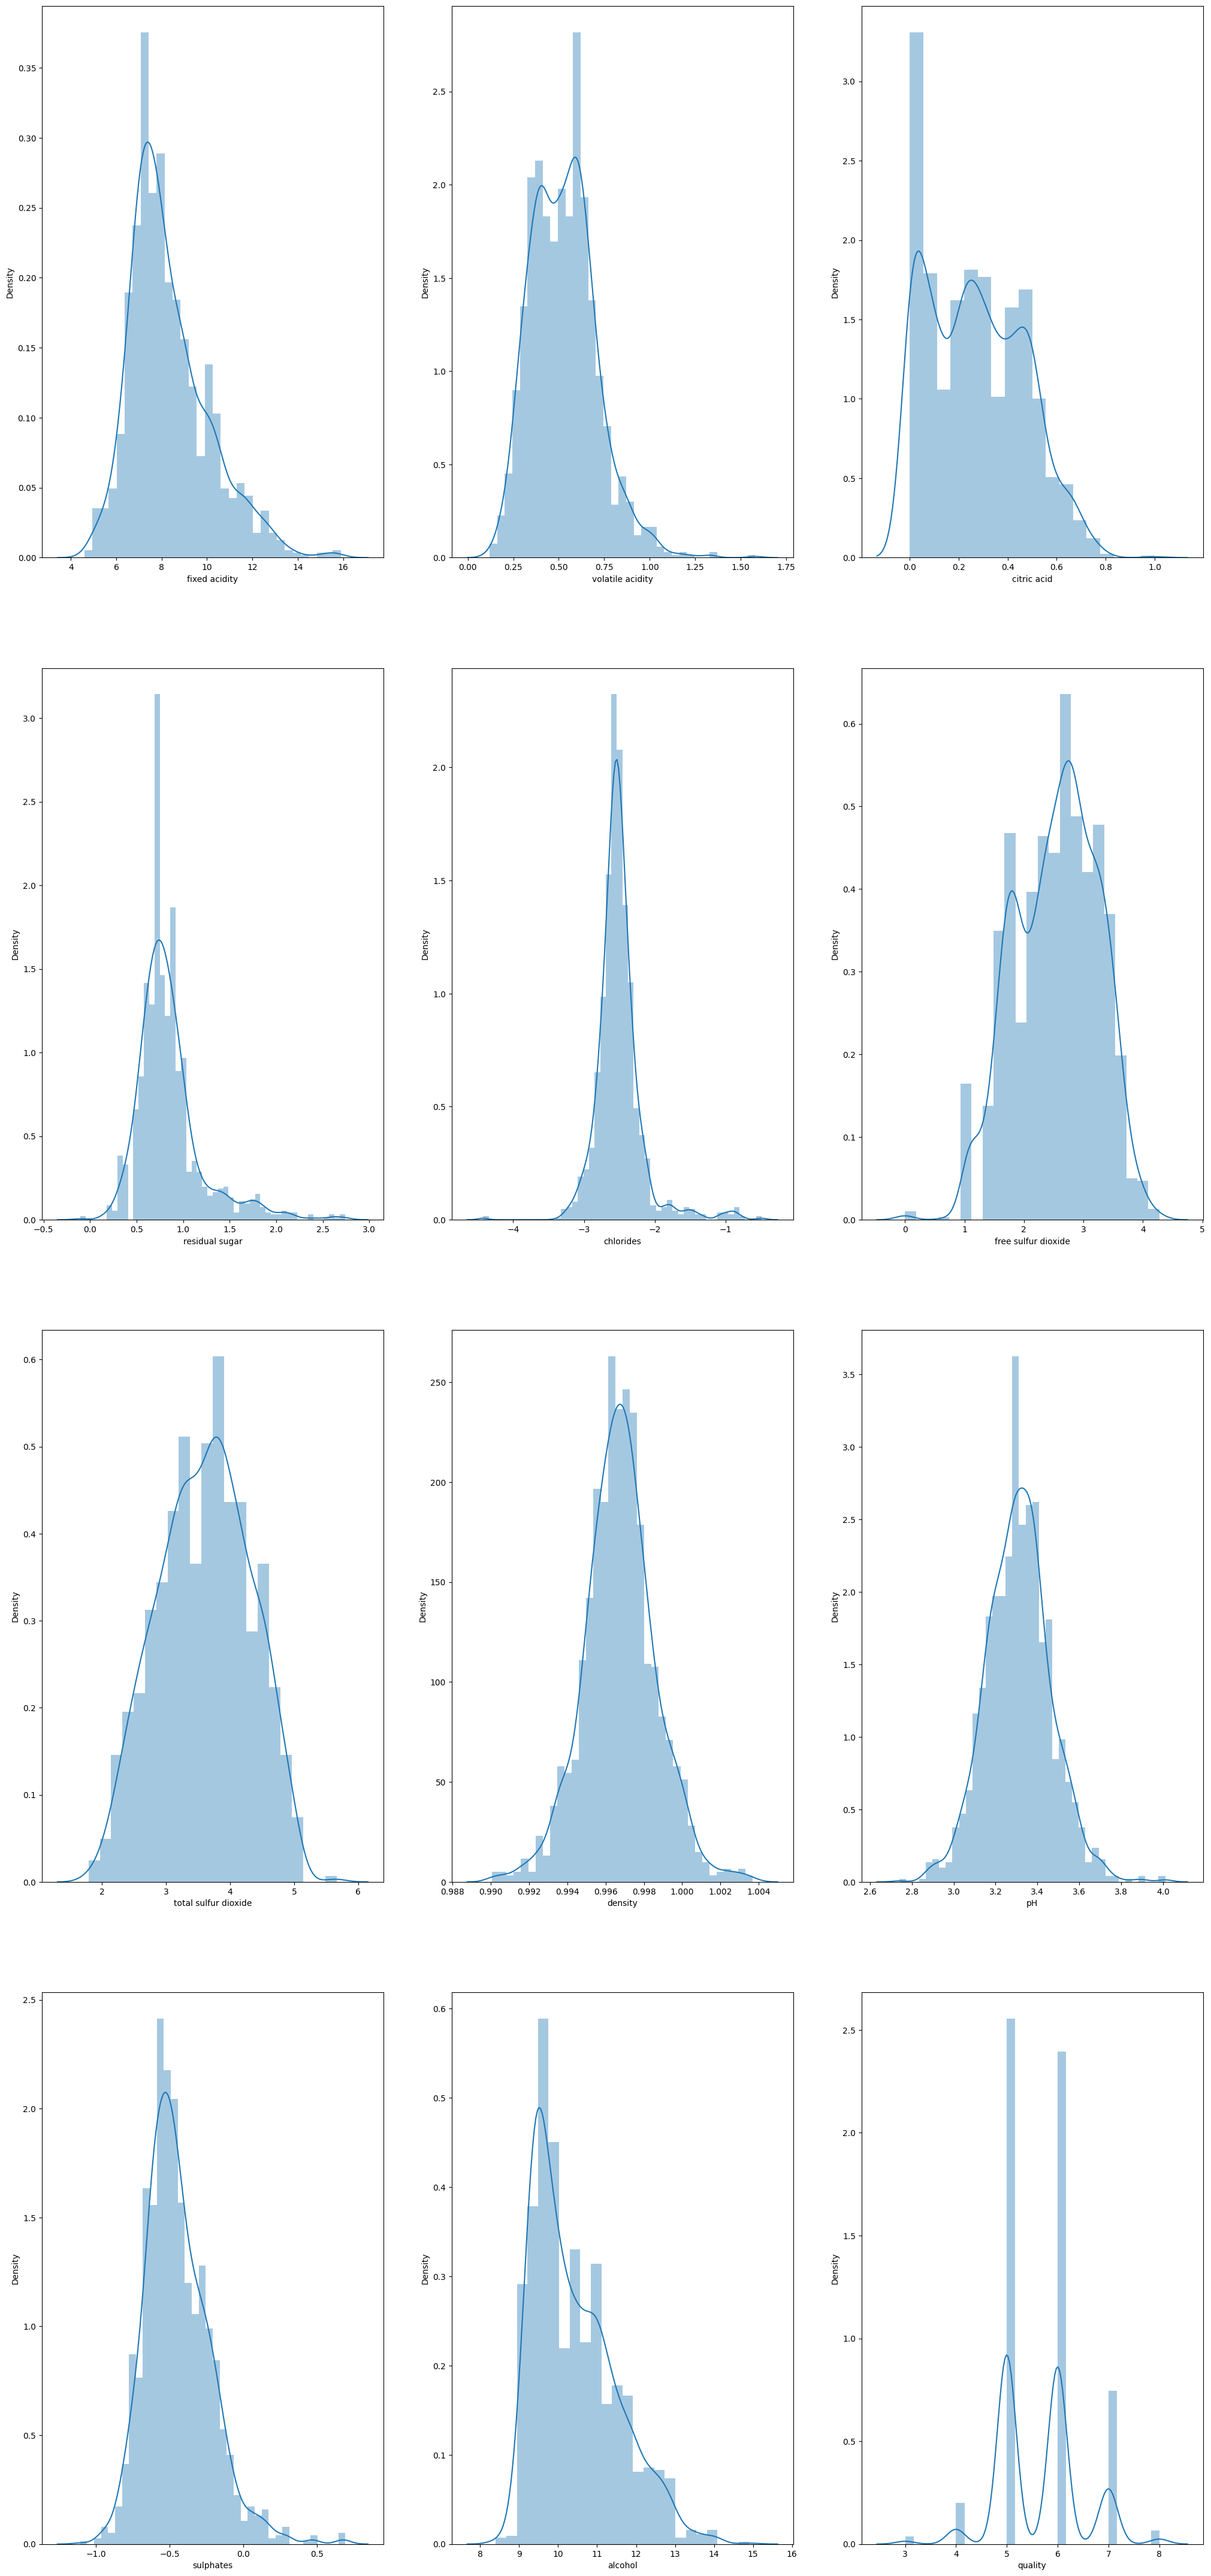

In [ ]:
cols = ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

for col in cols:
    data[col] = np.log(data[col])

plt.figure(figsize = (25,55))
for i in range(1, len(cols_name)+1):
    plt.subplot(4, 3, i)
    sns.distplot(data[cols_name[i-1]])
plt.show()

In [ ]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [ ]:
# Some interesting conclusion to be noted that
# Although there are a total of 240 duplicate rows,
# we will not be removing them.
# This is because we are assuming that this survey was made by different unique wine tasters who may have given same ratings.

data.duplicated().sum()

240

In [ ]:
print(data['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


**Check for Data Imbalance**

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


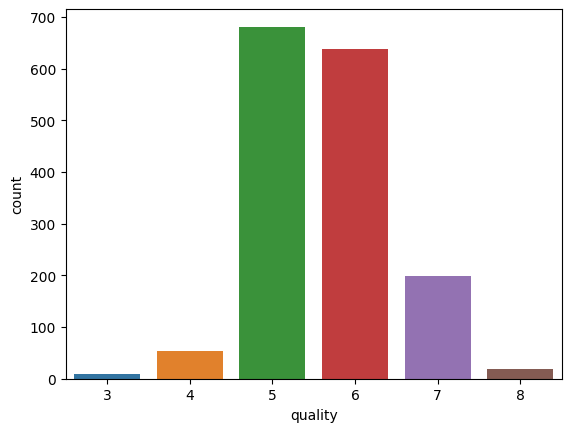

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
print(data['quality'].value_counts())
sns.countplot(x='quality', data=data)
plt.show()


**Check for Outliers**

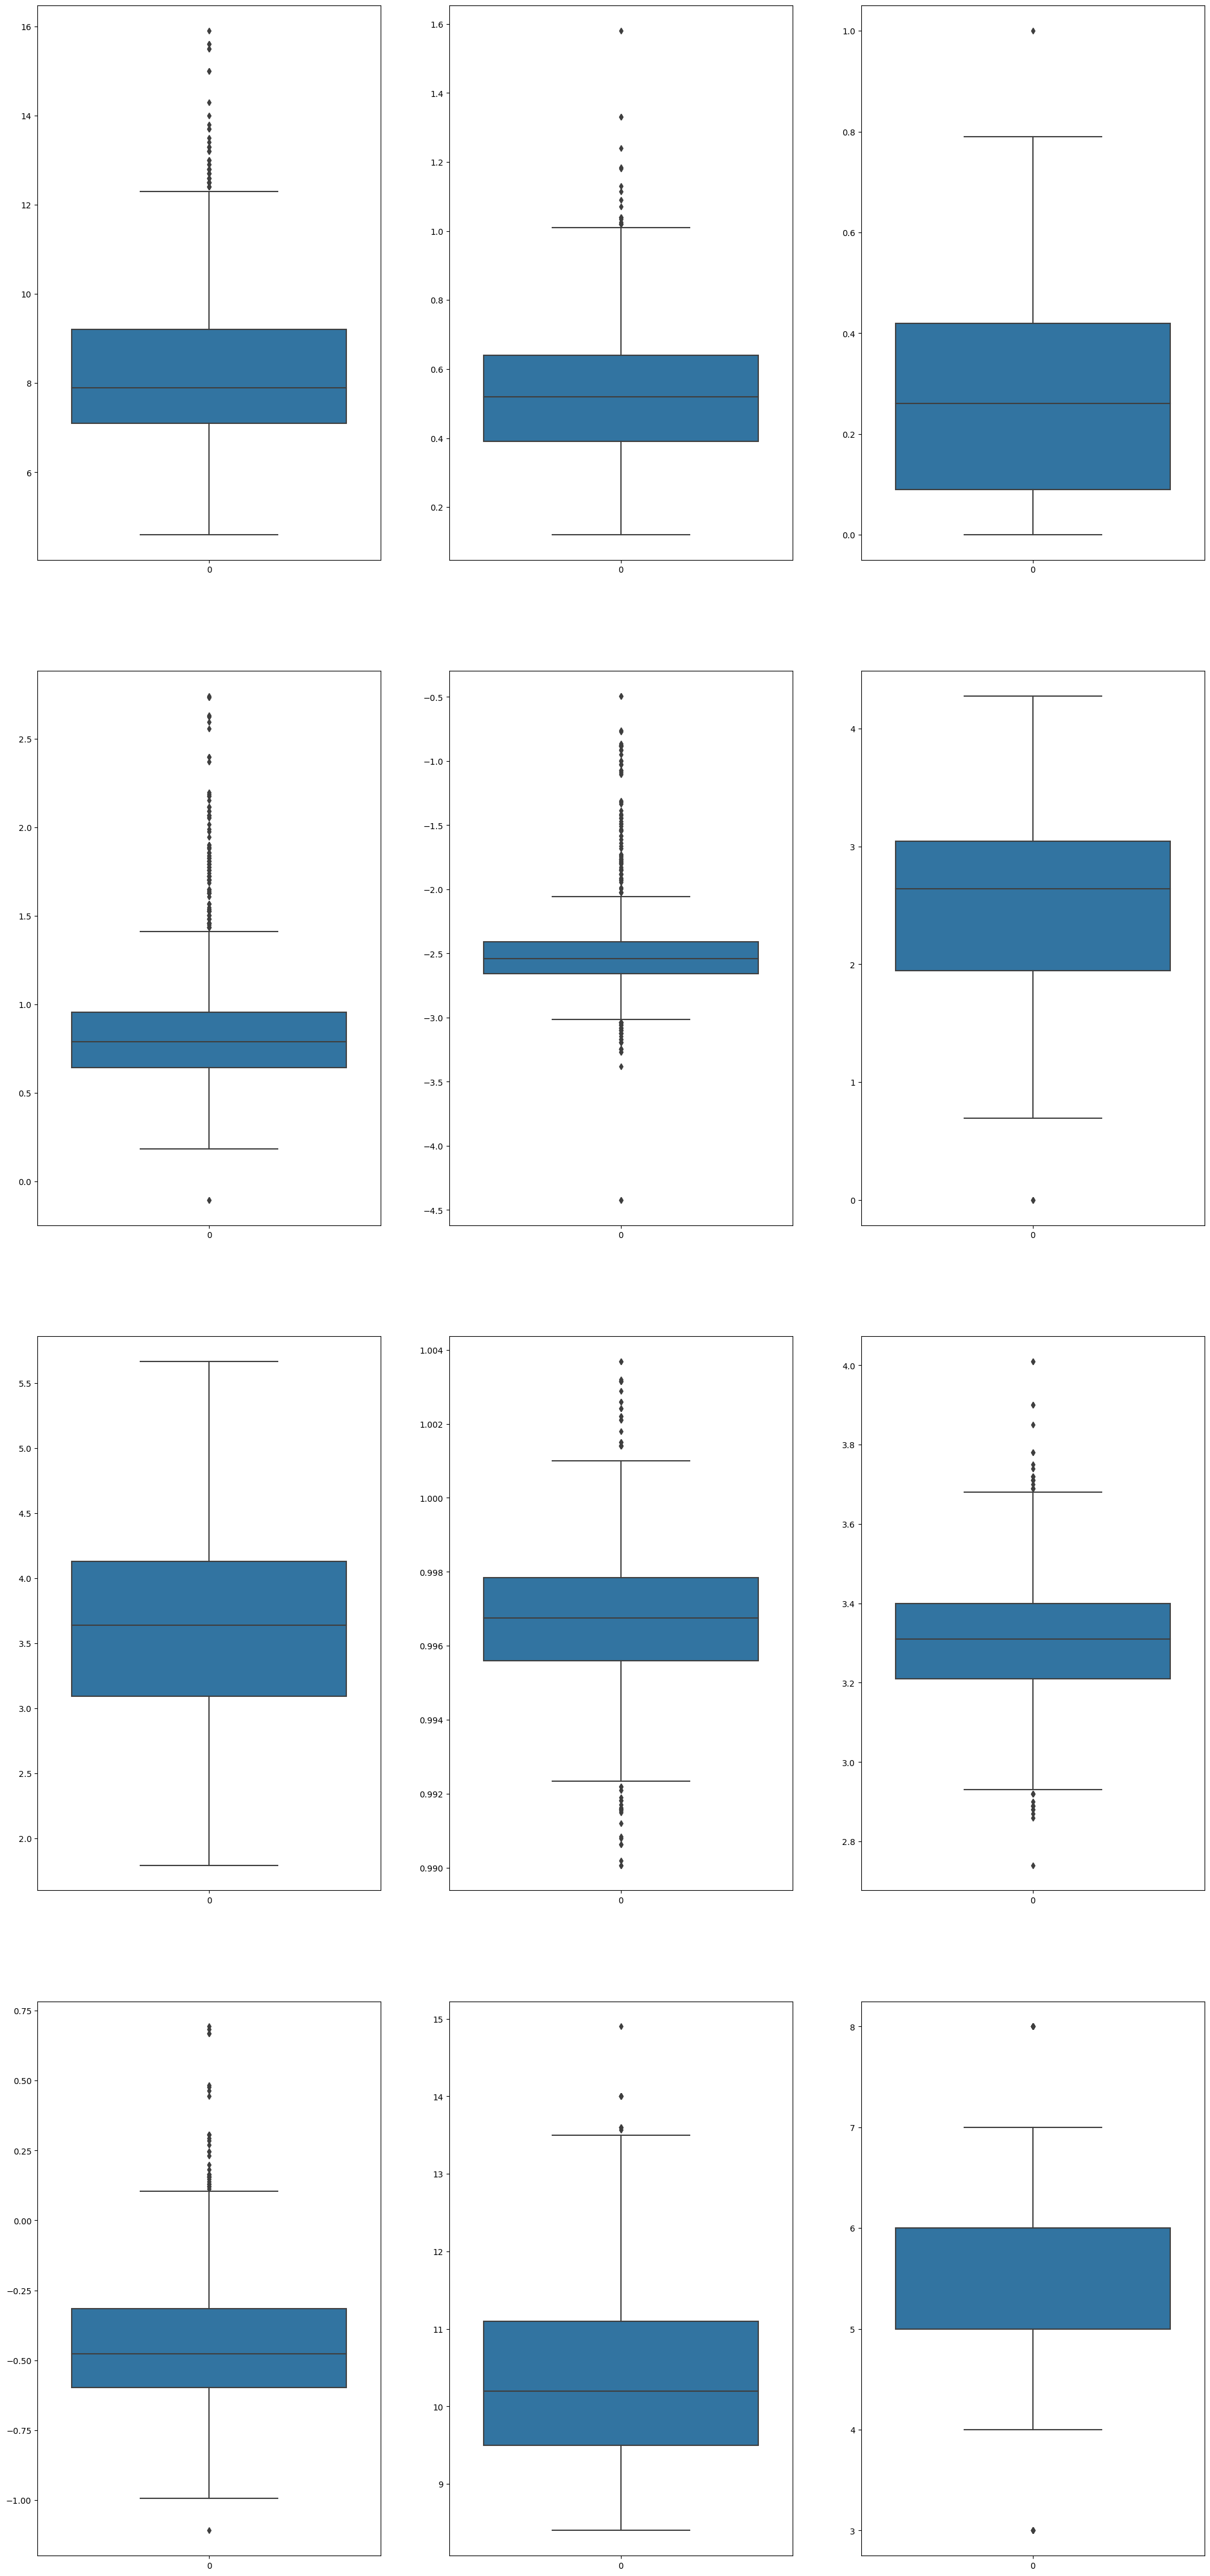

In [ ]:
plt.figure(figsize = (25,55))
for i in range(1, len(cols_name)+1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[cols_name[i-1]])
plt.show()

**Bivariate Analysis**

<Axes: >

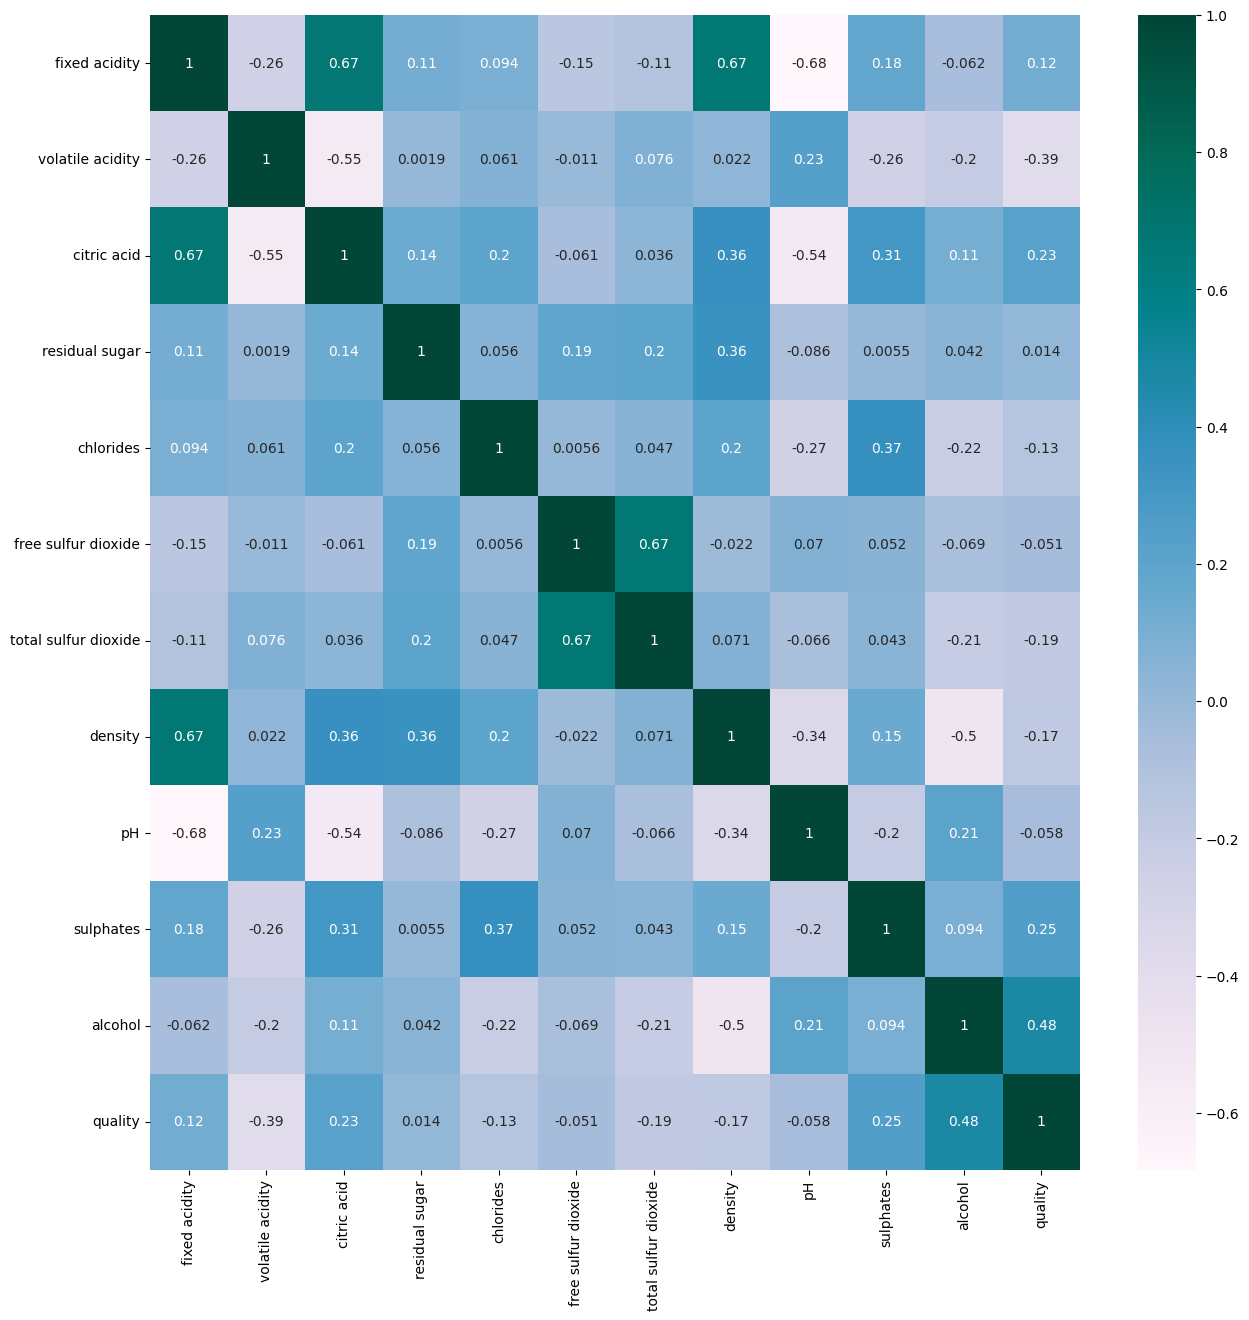

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot=True, cmap= 'PuBuGn')

In [ ]:
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

**Let's Perform Feature Selection**

Since Some Columns have very less Corr with target attributes, It's better to drop those columns
'residual sugar', 'free sulfur dioxide', 'pH'

In [ ]:
X = data.drop(columns=['residual sugar', 'free sulfur dioxide', 'pH', 'quality'], axis=1)
y = data['quality']

print(X.shape)
print(y.shape)

(1599, 8)
(1599,)


**Random Forest Classifier**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 42, stratify=y)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt


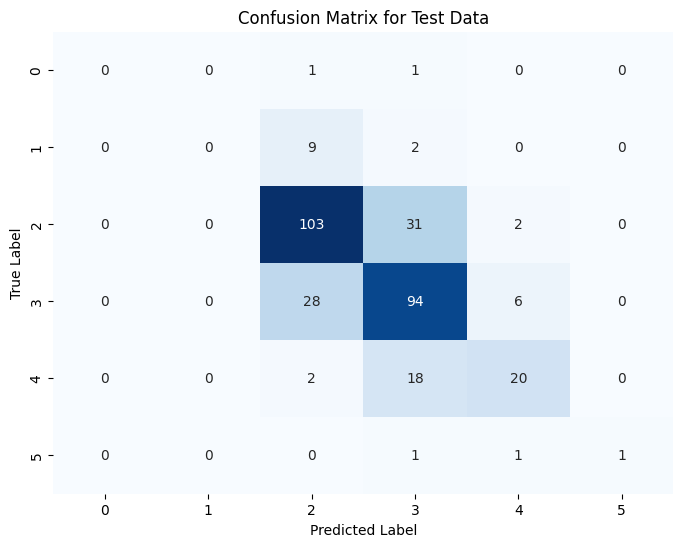

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have trained and tested your model (rf_pipeline) and have X_test, y_test
predictions = rf_pipeline.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Accuracy on Test Data: 68.125%


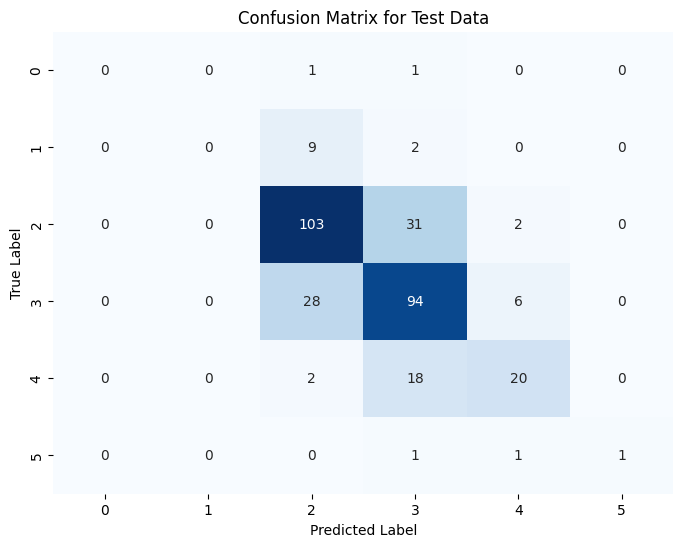

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.76      0.74       136
           6       0.64      0.73      0.68       128
           7       0.69      0.50      0.58        40
           8       1.00      0.33      0.50         3

    accuracy                           0.68       320
   macro avg       0.51      0.39      0.42       320
weighted avg       0.66      0.68      0.66       320


Accuracy on Whole Data: 93.62101313320825%


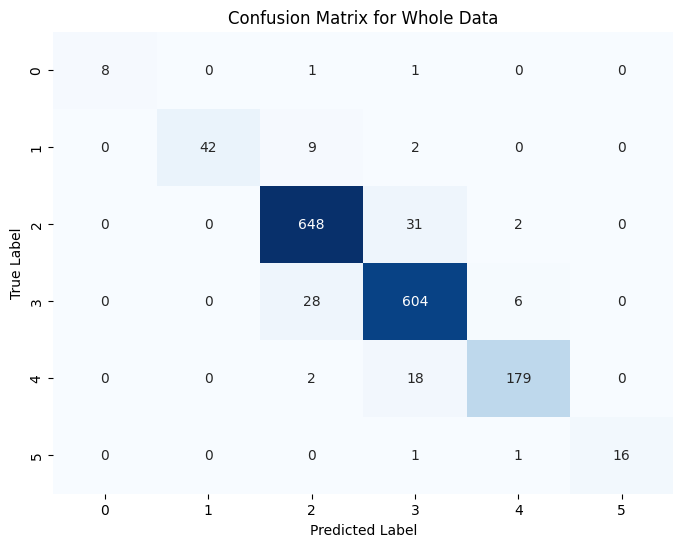

              precision    recall  f1-score   support

           3       1.00      0.80      0.89        10
           4       1.00      0.79      0.88        53
           5       0.94      0.95      0.95       681
           6       0.92      0.95      0.93       638
           7       0.95      0.90      0.93       199
           8       1.00      0.89      0.94        18

    accuracy                           0.94      1599
   macro avg       0.97      0.88      0.92      1599
weighted avg       0.94      0.94      0.94      1599



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have X_train, X_test, y_train, and y_test defined

# Create and train the random forest pipeline
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=18))
rf_pipeline.fit(X_train, y_train)

# Accuracy on Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

# Create confusion matrix for Test Data
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report for Test Data
print(classification_report(y_test, predictions))
print()

# Accuracy on Whole Data
predictions = rf_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")

# Create confusion matrix for Whole Data
conf_matrix = confusion_matrix(y, predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Whole Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report for Whole Data
print(classification_report(y, predictions))


**XGBClassification**

Accuracy on Test Data: 64.6875%


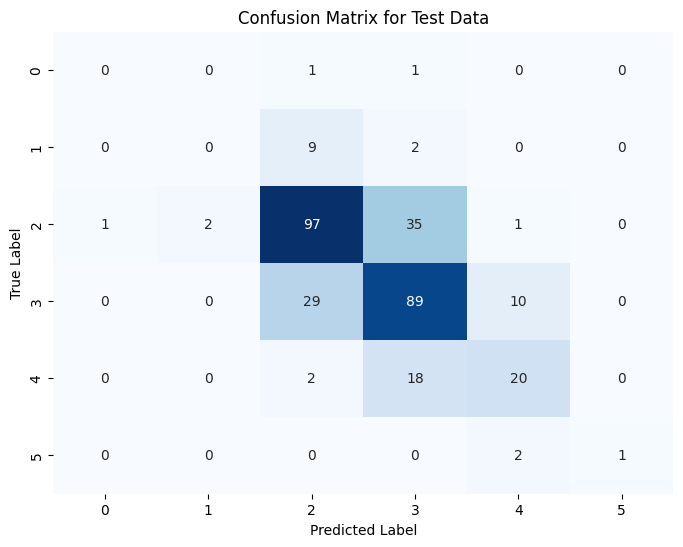

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        11
           2       0.70      0.71      0.71       136
           3       0.61      0.70      0.65       128
           4       0.61      0.50      0.55        40
           5       1.00      0.33      0.50         3

    accuracy                           0.65       320
   macro avg       0.49      0.37      0.40       320
weighted avg       0.63      0.65      0.63       320



In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform on the training data
y_train_encoded = label_encoder.fit_transform(y_train)

# Create and train the XGBoost pipeline
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state=18))
xgb_pipeline.fit(X_train, y_train_encoded)

# For testing data, use the same label_encoder to transform y_test
y_test_encoded = label_encoder.transform(y_test)

# Accuracy on Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test_encoded, predictions)
print(f"Accuracy on Test Data: {accuracy * 100}%")

# Create confusion matrix for Test Data
conf_matrix = confusion_matrix(y_test_encoded, predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report for Test Data
print(classification_report(y_test_encoded, predictions))


In [ ]:
from collections import Counter

counter = Counter(y)
print(counter)

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})


In [ ]:
from imblearn.over_sampling import SMOTE

upsample = SMOTE()
X, y = upsample.fit_resample(X, y)
counter = Counter(y)
print(counter)
print(X.shape)

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})
(4086, 8)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 42, stratify=y)

Accuracy on Test Data: 84.47432762836186%


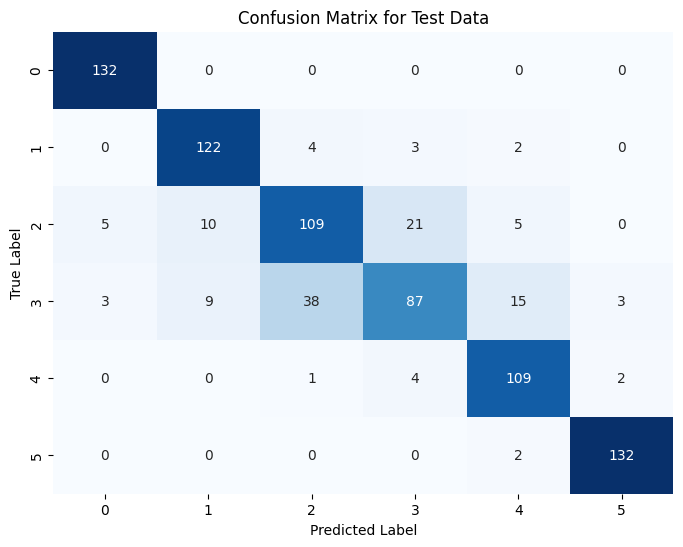

              precision    recall  f1-score   support

           3       0.94      1.00      0.97       132
           4       0.87      0.93      0.90       131
           5       0.72      0.73      0.72       150
           6       0.76      0.56      0.64       155
           7       0.82      0.94      0.88       116
           8       0.96      0.99      0.97       134

    accuracy                           0.84       818
   macro avg       0.84      0.86      0.85       818
weighted avg       0.84      0.84      0.84       818


Accuracy on Whole Data: 96.8918257464513%


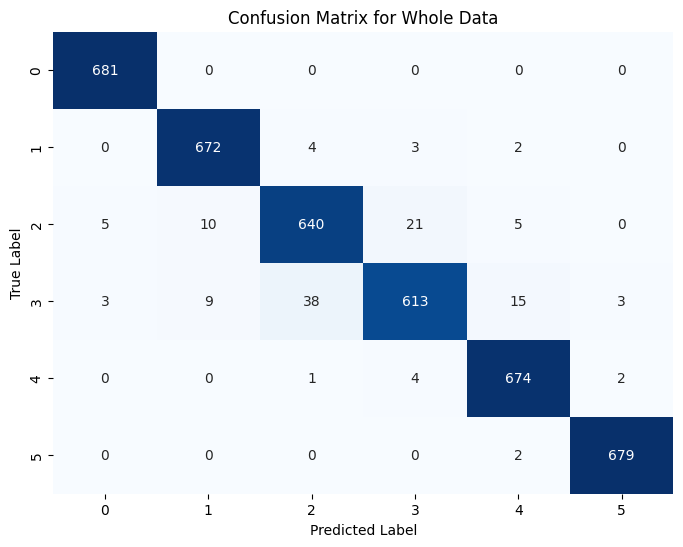

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       681
           4       0.97      0.99      0.98       681
           5       0.94      0.94      0.94       681
           6       0.96      0.90      0.93       681
           7       0.97      0.99      0.98       681
           8       0.99      1.00      0.99       681

    accuracy                           0.97      4086
   macro avg       0.97      0.97      0.97      4086
weighted avg       0.97      0.97      0.97      4086



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data X, y and you split it into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier
rf = RandomForestClassifier(random_state=18)
rf.fit(X_train, y_train)

# Accuracy on Test Data
predictions = rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

# Create confusion matrix for Test Data
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report for Test Data
print(classification_report(y_test, predictions))
print()

# Accuracy on Whole Data
predictions_whole = rf.predict(X)
accuracy_whole = accuracy_score(y, predictions_whole)
print(f"Accuracy on Whole Data: {accuracy_whole*100}%")

# Create confusion matrix for Whole Data
conf_matrix_whole = confusion_matrix(y, predictions_whole)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_whole, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Whole Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report for Whole Data
print(classification_report(y, predictions_whole))


Accuracy on Test Data: 83.98533007334963%


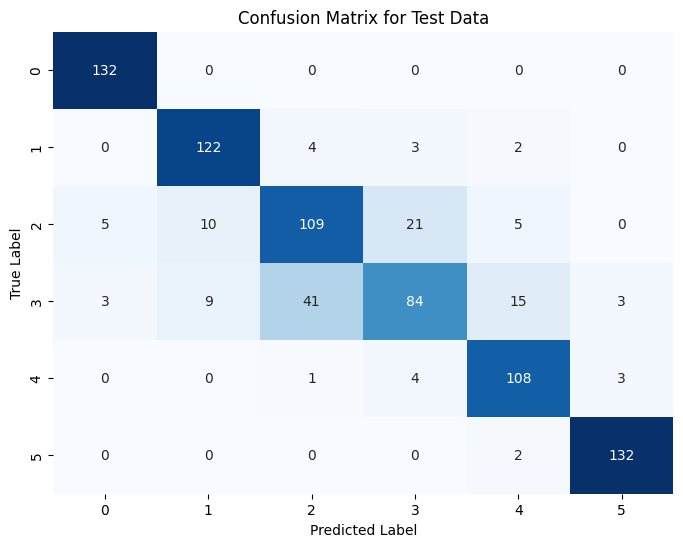

              precision    recall  f1-score   support

           3       0.94      1.00      0.97       132
           4       0.87      0.93      0.90       131
           5       0.70      0.73      0.71       150
           6       0.75      0.54      0.63       155
           7       0.82      0.93      0.87       116
           8       0.96      0.99      0.97       134

    accuracy                           0.84       818
   macro avg       0.84      0.85      0.84       818
weighted avg       0.83      0.84      0.83       818


Accuracy on Whole Data: 96.79393049437103%


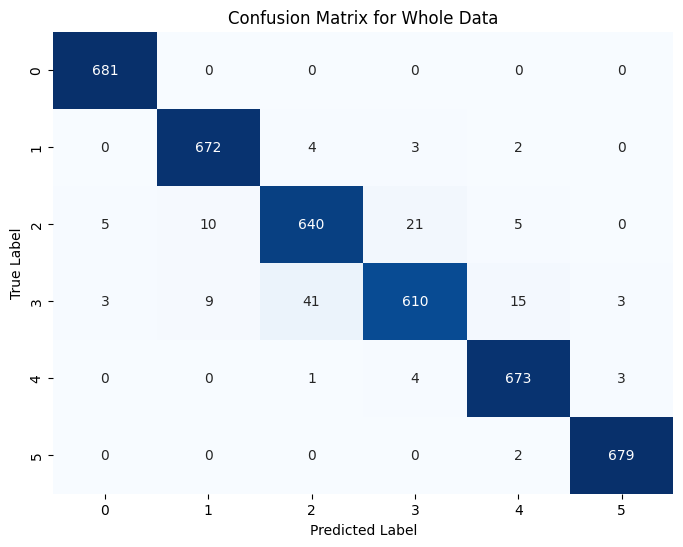

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       681
           4       0.97      0.99      0.98       681
           5       0.93      0.94      0.94       681
           6       0.96      0.90      0.92       681
           7       0.97      0.99      0.98       681
           8       0.99      1.00      0.99       681

    accuracy                           0.97      4086
   macro avg       0.97      0.97      0.97      4086
weighted avg       0.97      0.97      0.97      4086



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data X, y and you split it into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier pipeline
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=18))
rf_pipeline.fit(X_train, y_train)

# Accuracy on Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

# Create confusion matrix for Test Data
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report for Test Data
print(classification_report(y_test, predictions))
print()

# Accuracy on Whole Data
predictions_whole = rf_pipeline.predict(X)
accuracy_whole = accuracy_score(y, predictions_whole)
print(f"Accuracy on Whole Data: {accuracy_whole*100}%")

# Create confusion matrix for Whole Data
conf_matrix_whole = confusion_matrix(y, predictions_whole)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_whole, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Whole Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report for Whole Data
print(classification_report(y, predictions_whole))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Find right n_neighors

for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors)
    model.fit(X_train, y_train)
    scr = model.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.6772616136919315
For n_neighbors =  10  score is  0.6503667481662592
For n_neighbors =  15  score is  0.636919315403423
For n_neighbors =  20  score is  0.6075794621026895


In [ ]:
# For weights = 'distance'

# Try with weights

for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors, weights='distance')
    model.fit(X_train, y_train)
    scr = model.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.7481662591687042
For n_neighbors =  10  score is  0.7334963325183375
For n_neighbors =  15  score is  0.7334963325183375
For n_neighbors =  20  score is  0.7237163814180929


Accuracy on Test Data: 80.68459657701712%


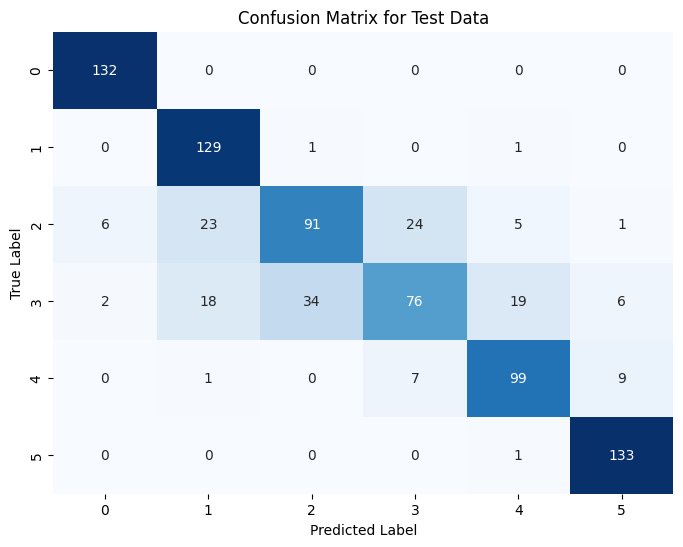

              precision    recall  f1-score   support

           3       0.94      1.00      0.97       132
           4       0.75      0.98      0.85       131
           5       0.72      0.61      0.66       150
           6       0.71      0.49      0.58       155
           7       0.79      0.85      0.82       116
           8       0.89      0.99      0.94       134

    accuracy                           0.81       818
   macro avg       0.80      0.82      0.80       818
weighted avg       0.80      0.81      0.79       818


Accuracy on Whole Data: 96.13313754282918%


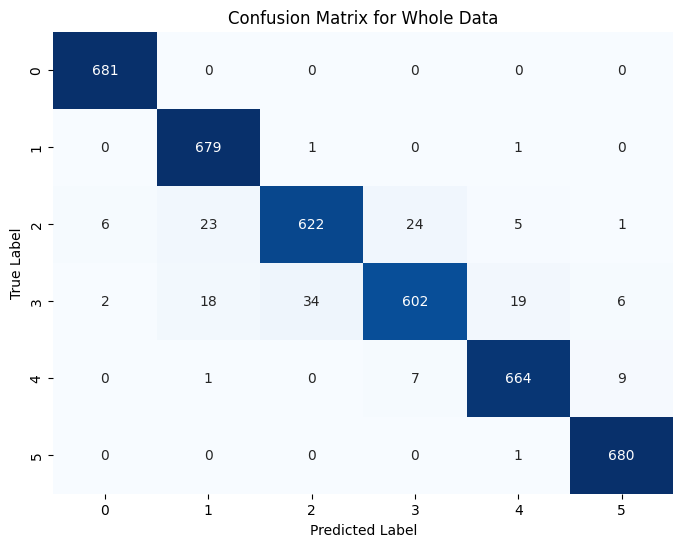

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       681
           4       0.94      1.00      0.97       681
           5       0.95      0.91      0.93       681
           6       0.95      0.88      0.92       681
           7       0.96      0.98      0.97       681
           8       0.98      1.00      0.99       681

    accuracy                           0.96      4086
   macro avg       0.96      0.96      0.96      4086
weighted avg       0.96      0.96      0.96      4086



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data X_train, y_train, X_test, y_test

# Create and train the KNN pipeline
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5, weights='distance'))
knn_pipeline.fit(X_train, y_train)

# Accuracy on Test Data
predictions = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

# Create confusion matrix for Test Data
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report for Test Data
print(classification_report(y_test, predictions))
print()

# Accuracy on Whole Data
predictions_whole = knn_pipeline.predict(X)
accuracy_whole = accuracy_score(y, predictions_whole)
print(f"Accuracy on Whole Data: {accuracy_whole*100}%")

# Create confusion matrix for Whole Data
conf_matrix_whole = confusion_matrix(y, predictions_whole)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_whole, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Whole Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report for Whole Data
print(classification_report(y, predictions_whole))



**Conclusion**

Random Forest Perfomed Very Good (~97% accuracy).
Since there are many algorithms available which is good at handling outlier so No need to Handle outliers.
By just performing 'Feature Selection' we got very good Accuracy.